In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
df=pd.read_csv("clean_kaggle_data_2021.csv")

C:\Users\le985\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,284,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q25_Encoded,Q25_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,6.0,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
15388,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,"80,000-89,999"
15389,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"10,000-19,999"
15390,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,"0-9,999"


# Part 1:

# Dealing with missing values

In [4]:
#Report columns that have more than 30% missing values 
to_drop = df.columns[df.isnull().mean() >0.3]
to_drop

Index(['Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
       'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=350)

In [5]:
#drop columns above
df = df.drop(to_drop, axis=1)
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q8,Q11,...,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q41,Q25_Encoded,Q25_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming language would you recommend ...,What type of computing platform do you use mos...,...,For how many years have you used machine learn...,In what industry is your current employer/cont...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,What is your current yearly compensation (appr...,Approximately how much money have you (or your...,What is the primary tool that you use at work ...,NaN,NaN
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,Python,A laptop,...,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...",2.0,"20,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,Under 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)",6.0,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,Python,A laptop,...,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,I do not know,$0-999,$0 ($USD),"Basic statistical software (Microsoft Excel, G...",0.0,"0-9,999"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,5-10 years,Academics/Education,"1000-9,999 employees",0,I do not know,"30,000-39,999",$0 ($USD),"Local development environments (RStudio, Jupyt...",3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,1-2 years,Manufacturing/Fabrication,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","3,000-3,999",$100-$999,NaN,0.0,"0-9,999"
15388,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,Python,A personal computer / desktop,...,3-4 years,Computers/Technology,"10,000 or more employees",20+,We use ML methods for generating insights (but...,"80,000-89,999","$100,000 or more ($USD)","Cloud-based data software & APIs (AWS, GCP, Az...",8.0,"80,000-89,999"
15389,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,Python,A laptop,...,1-2 years,Computers/Technology,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,"15,000-19,999","$1000-$9,999","Business intelligence software (Salesforce, Ta...",1.0,"10,000-19,999"
15390,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,Academics/Education,"1000-9,999 employees",20+,I do not know,$0-999,$1-$99,"Basic statistical software (Microsoft Excel, G...",0.0,"0-9,999"


In [6]:
#print remaining column names
print(df.columns)

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q8', 'Q11', 'Q13', 'Q15', 'Q20', 'Q21', 'Q22',
       'Q23', 'Q25', 'Q26', 'Q41', 'Q25_Encoded', 'Q25_buckets'],
      dtype='object')


In [7]:
# further drop unrelated columns to our target based on my judge from the survey question
df = df.drop(['Q8', 'Q26', 'Q41','Q11','Q13','Time from Start to Finish (seconds)'], axis=1)

In [8]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q15,Q20,Q21,Q22,Q23,Q25,Q25_Encoded,Q25_buckets
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,For how many years have you used machine learn...,In what industry is your current employer/cont...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,What is your current yearly compensation (appr...,NaN,NaN
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",2.0,"20,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,Under 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",6.0,"60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,I do not know,$0-999,0.0,"0-9,999"
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,Academics/Education,"1000-9,999 employees",0,I do not know,"30,000-39,999",3.0,"30,000-39,999"


In [9]:
#drop the first row
df.drop(index=df.index[0], axis=0, inplace=True)

In [10]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q15,Q20,Q21,Q22,Q23,Q25,Q25_Encoded,Q25_buckets
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",2.0,"20,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,Under 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",6.0,"60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,I do not know,$0-999,0.0,"0-9,999"
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,Academics/Education,"1000-9,999 employees",0,I do not know,"30,000-39,999",3.0,"30,000-39,999"
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,10-20 years,Academics/Education,50-249 employees,5-9,We use ML methods for generating insights (but...,"30,000-39,999",3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,1-2 years,Manufacturing/Fabrication,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","3,000-3,999",0.0,"0-9,999"
15388,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,3-4 years,Computers/Technology,"10,000 or more employees",20+,We use ML methods for generating insights (but...,"80,000-89,999",8.0,"80,000-89,999"
15389,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,1-2 years,Computers/Technology,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,"15,000-19,999",1.0,"10,000-19,999"
15390,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,Academics/Education,"1000-9,999 employees",20+,I do not know,$0-999,0.0,"0-9,999"


In [11]:
# Check how many NA each columns have
df.isnull().sum(axis=0)

Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7_Part_1      2924
Q15             961
Q20               0
Q21               0
Q22               0
Q23               0
Q25               0
Q25_Encoded       0
Q25_buckets       0
dtype: int64

In [12]:
df['Q7_Part_1']=df['Q7_Part_1'].astype(str)
np.unique(df['Q7_Part_1'],return_counts=True)

(array(['Python', 'nan'], dtype=object), array([12467,  2924], dtype=int64))

In [13]:
# we can not simply replace nan with python, so filling them with a separate value "other" showing missingness
df.at[df['Q7_Part_1']=='nan', 'Q7_Part_1'] = 'Other'
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q15,Q20,Q21,Q22,Q23,Q25,Q25_Encoded,Q25_buckets
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",2.0,"20,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Other,Under 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",6.0,"60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,I do not know,$0-999,0.0,"0-9,999"
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,Academics/Education,"1000-9,999 employees",0,I do not know,"30,000-39,999",3.0,"30,000-39,999"
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,10-20 years,Academics/Education,50-249 employees,5-9,We use ML methods for generating insights (but...,"30,000-39,999",3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,1-2 years,Manufacturing/Fabrication,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","3,000-3,999",0.0,"0-9,999"
15388,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,3-4 years,Computers/Technology,"10,000 or more employees",20+,We use ML methods for generating insights (but...,"80,000-89,999",8.0,"80,000-89,999"
15389,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,1-2 years,Computers/Technology,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,"15,000-19,999",1.0,"10,000-19,999"
15390,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,Other,NaN,Academics/Education,"1000-9,999 employees",20+,I do not know,$0-999,0.0,"0-9,999"


In [14]:
np.unique(df['Q7_Part_1'],return_counts=True)

(array(['Other', 'Python'], dtype=object), array([ 2924, 12467], dtype=int64))

In [15]:
# simply remove na values in Q15 column as the number of na is fairly small compare to the sample size
df = df.dropna(subset=['Q15'])

In [16]:
# we found out that alll na values have been removed
df.isnull().sum(axis=0)

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7_Part_1      0
Q15            0
Q20            0
Q21            0
Q22            0
Q23            0
Q25            0
Q25_Encoded    0
Q25_buckets    0
dtype: int64

In [17]:
df.shape

(14430, 15)

# Select subset of data based on country top 20 frequency in Q3

In [18]:
country=pd.DataFrame(list(np.unique(df['Q3'],return_counts=True))).T
country.columns=['country','count']
top20=country.sort_values(by=['count'],ascending=False).head(20)
top20

,country,count
23,India,3117
64,United States of America,1727
40,Other,774
30,Japan,632
7,Brazil,523
47,Russia,487
38,Nigeria,385
10,China,361
63,United Kingdom of Great Britain and Northern I...,348
52,Spain,330


In [19]:
# store top20 countries in a list
country_list=list(top20['country'])
country_list.remove('Other')
country_list

['India',
 'United States of America',
 'Japan',
 'Brazil',
 'Russia',
 'Nigeria',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Spain',
 'Germany',
 'France',
 'Turkey',
 'Pakistan',
 'Egypt',
 'Italy',
 'Canada',
 'South Korea',
 'Indonesia',
 'Australia']

In [20]:
# create subset of data
df=df[df['Q3'].isin(country_list)]
df.shape

(10341, 15)

In [21]:
np.unique(df['Q3'],return_counts=True)

(array(['Australia', 'Brazil', 'Canada', 'China', 'Egypt', 'France',
        'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Nigeria',
        'Pakistan', 'Russia', 'South Korea', 'Spain', 'Turkey',
        'United Kingdom of Great Britain and Northern Ireland',
        'United States of America'], dtype=object),
 array([ 190,  523,  219,  361,  252,  278,  317, 3117,  204,  222,  632,
         385,  265,  487,  213,  330,  271,  348, 1727], dtype=int64))

In [22]:
# reset index
df=df.reset_index(drop=True)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q15,Q20,Q21,Q22,Q23,Q25,Q25_Encoded,Q25_buckets
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",2.0,"20,000-29,999"
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Other,Under 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",6.0,"60,000-69,999"
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,I do not know,$0-999,0.0,"0-9,999"
3,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,10-20 years,Academics/Education,50-249 employees,5-9,We use ML methods for generating insights (but...,"30,000-39,999",3.0,"30,000-39,999"
4,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years,Python,2-3 years,Computers/Technology,"10,000 or more employees",3-4,"We have well established ML methods (i.e., mod...","15,000-19,999",1.0,"10,000-19,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10336,18-21,Man,India,Bachelor’s degree,Software Engineer,1-3 years,Python,Under 1 year,Academics/Education,0-49 employees,1-2,We use ML methods for generating insights (but...,$0-999,0.0,"0-9,999"
10337,60-69,Man,United States of America,Bachelor’s degree,Program/Project Manager,20+ years,Python,Under 1 year,Academics/Education,"10,000 or more employees",5-9,"We recently started using ML methods (i.e., mo...","300,000-499,999",14.0,">300,000"
10338,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,1-2 years,Manufacturing/Fabrication,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","3,000-3,999",0.0,"0-9,999"
10339,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,3-4 years,Computers/Technology,"10,000 or more employees",20+,We use ML methods for generating insights (but...,"80,000-89,999",8.0,"80,000-89,999"


# Encoding categorical data

In [23]:
np.unique(df['Q1'],return_counts=True)

(array(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49',
        '50-54', '55-59', '60-69', '70+'], dtype=object),
 array([ 679, 1502, 2154, 1730, 1291,  965,  747,  528,  339,  328,   78],
       dtype=int64))

In [24]:
age_encode = {   '18-21': 0,
    '22-24': 1,
    '25-29': 2, 
    '30-34': 3,
    '35-39': 4,
    '40-44': 5, 
    '45-49': 6,
    '50-54': 7,
    '55-59': 8, 
    '60-69': 9,
    '70+': 10}

In [25]:
df.loc[:,'Q1_Encoded'] = df.loc[:,'Q1'].map(age_encode)
df.loc[:,'Q1_Encoded']=df.loc[:,'Q1_Encoded'].astype(int)
df['Q1_Encoded'].unique()

array([ 7,  1,  6,  3,  5,  0,  2,  4,  8,  9, 10])

In [26]:
np.unique(df['Q15'],return_counts=True)

(array(['1-2 years', '10-20 years', '2-3 years', '20 or more years',
        '3-4 years', '4-5 years', '5-10 years',
        'I do not use machine learning methods', 'Under 1 year'],
       dtype=object),
 array([2125,  252, 1255,  145,  698,  590,  686, 1354, 3236], dtype=int64))

In [27]:
Q15_encode = {   'I do not use machine learning methods': 0,
    'Under 1 year': 1,
    '1-2 years': 2, 
    '2-3 years': 3,
    '3-4 years': 4,
    '4-5 years': 5, 
    '5-10 years': 6,
    '10-20 years': 7,
    '20 or more years': 8}

In [28]:
df.loc[:,'Q15_Encoded'] = df.loc[:,'Q15'].map(Q15_encode)
df.loc[:,'Q15_Encoded']=df.loc[:,'Q15_Encoded'].astype(int)
df['Q15_Encoded'].unique()

array([6, 1, 0, 7, 3, 2, 4, 5, 8])

In [29]:
# Create dummy features for each categorical feature
dummies_Q2 = pd.get_dummies(df['Q2'], prefix='Q2')
dummies_Q3 = pd.get_dummies(df['Q3'], prefix='Q3')
dummies_Q4 = pd.get_dummies(df['Q4'], prefix='Q4')
dummies_Q5 = pd.get_dummies(df['Q5'], prefix='Q5')
dummies_Q6 = pd.get_dummies(df['Q6'], prefix='Q6')
dummies_Q7 = pd.get_dummies(df['Q7_Part_1'], prefix='Q7')
dummies_Q20 = pd.get_dummies(df['Q20'], prefix='Q20')
dummies_Q21 = pd.get_dummies(df['Q21'], prefix='Q21')
dummies_Q22 = pd.get_dummies(df['Q22'], prefix='Q22')
dummies_Q23 = pd.get_dummies(df['Q23'], prefix='Q23')
# Add the new features to the dataframe via concating
tempdf = pd.concat([df, dummies_Q2,dummies_Q3,dummies_Q4,dummies_Q5,dummies_Q6,dummies_Q7,dummies_Q20,dummies_Q21,dummies_Q22,dummies_Q23], axis=1)
tempdf

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q15,Q20,Q21,...,Q22_15-19,Q22_20+,Q22_3-4,Q22_5-9,Q23_I do not know,Q23_No (we do not use ML methods),Q23_We are exploring ML methods (and may one day put a model into production),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production)
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,...,0,0,1,0,0,1,0,0,0,0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Other,Under 1 year,Manufacturing/Fabrication,"1000-9,999 employees",...,0,0,0,0,0,0,1,0,0,0
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",...,0,0,0,0,1,0,0,0,0,0
3,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,10-20 years,Academics/Education,50-249 employees,...,0,0,0,1,0,0,0,0,0,1
4,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years,Python,2-3 years,Computers/Technology,"10,000 or more employees",...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10336,18-21,Man,India,Bachelor’s degree,Software Engineer,1-3 years,Python,Under 1 year,Academics/Education,0-49 employees,...,0,0,0,0,0,0,0,0,0,1
10337,60-69,Man,United States of America,Bachelor’s degree,Program/Project Manager,20+ years,Python,Under 1 year,Academics/Education,"10,000 or more employees",...,0,0,0,1,0,0,0,0,1,0
10338,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,1-2 years,Manufacturing/Fabrication,"10,000 or more employees",...,0,1,0,0,0,0,0,1,0,0
10339,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,3-4 years,Computers/Technology,"10,000 or more employees",...,0,1,0,0,0,0,0,0,0,1


In [30]:
# Drop the original categorical feature columns
tempdf = tempdf.drop(['Q1','Q2','Q3','Q4','Q5','Q6','Q7_Part_1','Q15','Q20','Q21','Q22','Q23','Q25'],axis=1)

# Drop one of each of the dummy variables because its value is implied
# by the other dummy variable columns

cleanDF = tempdf.drop(['Q2_Prefer to self-describe','Q3_Nigeria','Q4_I prefer not to answer','Q5_Other','Q6_< 1 years','Q7_Other','Q20_Other','Q21_0-49 employees','Q22_15-19','Q23_I do not know'],axis=1)
cleanDF

,Q25_Encoded,Q25_buckets,Q1_Encoded,Q15_Encoded,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Woman,Q3_Australia,Q3_Brazil,...,Q22_1-2,Q22_10-14,Q22_20+,Q22_3-4,Q22_5-9,Q23_No (we do not use ML methods),Q23_We are exploring ML methods (and may one day put a model into production),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production)
0,2.0,"20,000-29,999",7,6,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,6.0,"60,000-69,999",7,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0.0,"0-9,999",1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,"30,000-39,999",6,7,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1.0,"10,000-19,999",3,3,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10336,0.0,"0-9,999",0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10337,14.0,">300,000",9,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10338,0.0,"0-9,999",3,2,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10339,8.0,"80,000-89,999",4,4,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Part 2:

# Prepare training set and test set

In [31]:
df_train,df_test = train_test_split(cleanDF,test_size=0.3, random_state=27)

In [32]:
df_train

,Q25_Encoded,Q25_buckets,Q1_Encoded,Q15_Encoded,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Woman,Q3_Australia,Q3_Brazil,...,Q22_1-2,Q22_10-14,Q22_20+,Q22_3-4,Q22_5-9,Q23_No (we do not use ML methods),Q23_We are exploring ML methods (and may one day put a model into production),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production)
4771,1.0,"10,000-19,999",1,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
7551,3.0,"30,000-39,999",1,4,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3744,0.0,"0-9,999",0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6560,0.0,"0-9,999",3,5,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
954,5.0,"50,000-59,999",4,4,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,3.0,"30,000-39,999",4,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4848,13.0,"200,000-299,999",4,6,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3912,0.0,"0-9,999",2,2,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3768,0.0,"0-9,999",2,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [33]:
df_test

,Q25_Encoded,Q25_buckets,Q1_Encoded,Q15_Encoded,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Woman,Q3_Australia,Q3_Brazil,...,Q22_1-2,Q22_10-14,Q22_20+,Q22_3-4,Q22_5-9,Q23_No (we do not use ML methods),Q23_We are exploring ML methods (and may one day put a model into production),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production)
1200,0.0,"0-9,999",3,5,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7059,10.0,"100,000-124,999",1,4,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9181,2.0,"20,000-29,999",7,2,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9899,0.0,"0-9,999",7,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2114,11.0,"125,000-149,999",9,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,0.0,"0-9,999",4,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
83,1.0,"10,000-19,999",3,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3295,0.0,"0-9,999",2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8998,6.0,"60,000-69,999",2,4,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Feature importance and selection

**Perform standardization to the data:**

In [34]:
df_train_X=df_train.drop(['Q25_Encoded','Q25_buckets'],axis=1)
df_test_X= df_test.drop(['Q25_Encoded','Q25_buckets'],axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train_X)
X_test = scaler.transform(df_test_X)

In [36]:
X_train_df=pd.DataFrame(X_train,index=df_train_X.index,columns=df_train_X.columns)
X_train_df

,Q1_Encoded,Q15_Encoded,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Woman,Q3_Australia,Q3_Brazil,Q3_Canada,Q3_China,...,Q22_1-2,Q22_10-14,Q22_20+,Q22_3-4,Q22_5-9,Q23_No (we do not use ML methods),Q23_We are exploring ML methods (and may one day put a model into production),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production)
4771,-1.035916,-0.677886,0.46746,-0.057679,-0.117156,-0.438659,-0.135766,-0.234410,-0.143981,5.297950,...,-0.523947,-0.265317,-0.574691,-0.42288,2.730496,2.085568,-0.519661,-0.486881,-0.408248,-0.359407
7551,-1.035916,0.853971,0.46746,-0.057679,-0.117156,-0.438659,-0.135766,-0.234410,-0.143981,-0.188752,...,-0.523947,-0.265317,-0.574691,-0.42288,2.730496,-0.479486,-0.519661,2.053888,-0.408248,-0.359407
3744,-1.460224,-0.167267,0.46746,-0.057679,-0.117156,-0.438659,-0.135766,-0.234410,-0.143981,-0.188752,...,-0.523947,-0.265317,-0.574691,-0.42288,-0.366234,-0.479486,-0.519661,-0.486881,-0.408248,-0.359407
6560,-0.187298,1.364590,0.46746,-0.057679,-0.117156,-0.438659,-0.135766,4.266021,-0.143981,-0.188752,...,-0.523947,-0.265317,-0.574691,-0.42288,2.730496,-0.479486,-0.519661,-0.486881,-0.408248,-0.359407
954,0.237010,0.853971,0.46746,-0.057679,-0.117156,-0.438659,-0.135766,-0.234410,-0.143981,5.297950,...,-0.523947,-0.265317,-0.574691,-0.42288,2.730496,-0.479486,-0.519661,2.053888,-0.408248,-0.359407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,0.237010,-1.188505,0.46746,-0.057679,-0.117156,-0.438659,-0.135766,-0.234410,-0.143981,-0.188752,...,-0.523947,-0.265317,1.740064,-0.42288,-0.366234,2.085568,-0.519661,-0.486881,-0.408248,-0.359407
4848,0.237010,1.875210,0.46746,-0.057679,-0.117156,-0.438659,-0.135766,-0.234410,-0.143981,-0.188752,...,-0.523947,-0.265317,1.740064,-0.42288,-0.366234,-0.479486,-0.519661,-0.486881,2.449490,-0.359407
3912,-0.611607,-0.167267,0.46746,-0.057679,-0.117156,-0.438659,-0.135766,-0.234410,-0.143981,-0.188752,...,1.908591,-0.265317,-0.574691,-0.42288,-0.366234,2.085568,-0.519661,-0.486881,-0.408248,-0.359407
3768,-0.611607,-0.677886,0.46746,-0.057679,-0.117156,-0.438659,-0.135766,-0.234410,-0.143981,-0.188752,...,1.908591,-0.265317,-0.574691,-0.42288,-0.366234,-0.479486,1.924332,-0.486881,-0.408248,-0.359407


In [37]:
X_test_df=pd.DataFrame(X_test,index=df_test_X.index,columns=df_test_X.columns)
X_test_df

,Q1_Encoded,Q15_Encoded,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Woman,Q3_Australia,Q3_Brazil,Q3_Canada,Q3_China,...,Q22_1-2,Q22_10-14,Q22_20+,Q22_3-4,Q22_5-9,Q23_No (we do not use ML methods),Q23_We are exploring ML methods (and may one day put a model into production),"Q23_We have well established ML methods (i.e., models in production for more than 2 years)","Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q23_We use ML methods for generating insights (but do not put working models into production)
1200,-0.187298,1.364590,-2.139222,-0.057679,-0.117156,2.279675,-0.135766,-0.23441,-0.143981,-0.188752,...,-0.523947,-0.265317,-0.574691,-0.422880,2.730496,-0.479486,-0.519661,-0.486881,-0.408248,-0.359407
7059,-1.035916,0.853971,-2.139222,-0.057679,-0.117156,2.279675,-0.135766,-0.23441,-0.143981,-0.188752,...,-0.523947,-0.265317,1.740064,-0.422880,-0.366234,-0.479486,-0.519661,-0.486881,-0.408248,-0.359407
9181,1.509936,-0.167267,0.467460,-0.057679,-0.117156,-0.438659,-0.135766,-0.23441,-0.143981,-0.188752,...,-0.523947,-0.265317,-0.574691,2.364738,-0.366234,2.085568,-0.519661,-0.486881,-0.408248,-0.359407
9899,1.509936,-0.167267,0.467460,-0.057679,-0.117156,-0.438659,-0.135766,-0.23441,-0.143981,-0.188752,...,1.908591,-0.265317,-0.574691,-0.422880,-0.366234,-0.479486,-0.519661,-0.486881,2.449490,-0.359407
2114,2.358553,-0.677886,0.467460,-0.057679,-0.117156,-0.438659,-0.135766,-0.23441,-0.143981,-0.188752,...,-0.523947,-0.265317,1.740064,-0.422880,-0.366234,-0.479486,-0.519661,2.053888,-0.408248,-0.359407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,0.237010,0.853971,0.467460,-0.057679,-0.117156,-0.438659,-0.135766,-0.23441,-0.143981,-0.188752,...,-0.523947,-0.265317,-0.574691,2.364738,-0.366234,-0.479486,-0.519661,-0.486881,2.449490,-0.359407
83,-0.187298,-1.188505,0.467460,-0.057679,-0.117156,-0.438659,-0.135766,-0.23441,-0.143981,-0.188752,...,-0.523947,-0.265317,-0.574691,-0.422880,-0.366234,2.085568,-0.519661,-0.486881,-0.408248,-0.359407
3295,-0.611607,-0.677886,0.467460,-0.057679,-0.117156,-0.438659,-0.135766,-0.23441,-0.143981,-0.188752,...,-0.523947,-0.265317,-0.574691,-0.422880,-0.366234,-0.479486,-0.519661,-0.486881,-0.408248,-0.359407
8998,-0.611607,0.853971,0.467460,-0.057679,-0.117156,-0.438659,-0.135766,-0.23441,-0.143981,-0.188752,...,-0.523947,-0.265317,1.740064,-0.422880,-0.366234,-0.479486,-0.519661,-0.486881,2.449490,-0.359407


In [38]:
df_train_y=df_train['Q25_Encoded']
df_train_y

4771     1.0
7551     3.0
3744     0.0
6560     0.0
954      5.0
        ... 
7192     3.0
4848    13.0
3912     0.0
3768     0.0
5139     0.0
Name: Q25_Encoded, Length: 7238, dtype: float64

In [39]:
df_test_y=df_test['Q25_Encoded']
df_test_y

1200     0.0
7059    10.0
9181     2.0
9899     0.0
2114    11.0
        ... 
9009     0.0
83       1.0
3295     0.0
8998     6.0
5744     0.0
Name: Q25_Encoded, Length: 3103, dtype: float64

**Select features using Lasso Regularization:**

In [40]:
# use Grid Search to find the optimal value of hyperparameter in Lasso Regularizer
reg_gridsearch = linear_model.Lasso(random_state=27)
#Parameters to test
parameters = {'alpha':[0.1,0.2,0.3,0.5,1], # Constant that multiplies the L1 term. Defaults to 1.0.
             'normalize':[True,False]} #

# Compare parameters by score of model 
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, scoring=acc_scorer_lm)
grid_obj_lm = grid_obj_lm.fit(X_train_df, df_train_y)

reg_gridsearch = grid_obj_lm.best_estimator_  #Select best parameter combination

In [41]:
#return the optimal parameters
print('alpha (Constant that multiplies the L1 term):',grid_obj_lm.best_estimator_.alpha) 
print('normalize:',grid_obj_lm.best_estimator_.normalize)

alpha (Constant that multiplies the L1 term): 0.1
normalize: False


In [42]:
reg_gridsearch.fit(X_train_df, df_train_y)
reg_gridsearch.score(X_train_df, df_train_y)

0.5679619936753324

In [43]:
# select top 26 highest coefficients and print corresponding features
select=sorted(list(zip(reg_gridsearch.coef_, X_train_df)),reverse=True)[0:26]
select

[(1.8082472156379272, 'Q3_United States of America'),
 (0.5492674136863303, 'Q15_Encoded'),
 (0.5335019850331005, 'Q1_Encoded'),
 (0.5001364622211217, 'Q3_Australia'),
 (0.4159805794248001, 'Q3_Germany'),
 (0.40819525848689, 'Q3_United Kingdom of Great Britain and Northern Ireland'),
 (0.3597240120765448, 'Q3_Canada'),
 (0.30451684660071543,
  'Q23_We have well established ML methods (i.e., models in production for more than 2 years)'),
 (0.301560227317547, 'Q6_10-20 years'),
 (0.19839742180275005, 'Q3_Japan'),
 (0.1924159782994819, 'Q22_20+'),
 (0.18590016071286308, 'Q6_20+ years'),
 (0.13611400745672445, 'Q2_Man'),
 (0.13420895556943974, 'Q3_France'),
 (0.131679384794888, 'Q6_5-10 years'),
 (0.11088190985039943, 'Q5_Product Manager'),
 (0.10338256329106021, 'Q21_10,000 or more employees'),
 (0.09070835361733183, 'Q5_Program/Project Manager'),
 (0.07333436309536898,
  'Q23_We recently started using ML methods (i.e., models in production for less than 2 years)'),
 (0.051439028860515684

In [44]:
#get the list of features
feature=list(pd.DataFrame(select).iloc[:,1])
feature

['Q3_United States of America',
 'Q15_Encoded',
 'Q1_Encoded',
 'Q3_Australia',
 'Q3_Germany',
 'Q3_United Kingdom of Great Britain and Northern Ireland',
 'Q3_Canada',
 'Q23_We have well established ML methods (i.e., models in production for more than 2 years)',
 'Q6_10-20 years',
 'Q3_Japan',
 'Q22_20+',
 'Q6_20+ years',
 'Q2_Man',
 'Q3_France',
 'Q6_5-10 years',
 'Q5_Product Manager',
 'Q21_10,000 or more employees',
 'Q5_Program/Project Manager',
 'Q23_We recently started using ML methods (i.e., models in production for less than 2 years)',
 'Q3_Spain',
 'Q4_Master’s degree',
 'Q21_1000-9,999 employees',
 'Q20_Medical/Pharmaceutical',
 'Q3_South Korea',
 'Q20_Accounting/Finance',
 'Q5_Data Scientist']

In [45]:
# only select those 26 features we get from above in our dataset
X_train_Final=X_train_df[feature]
X_train_Final

,Q3_United States of America,Q15_Encoded,Q1_Encoded,Q3_Australia,Q3_Germany,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_Canada,"Q23_We have well established ML methods (i.e., models in production for more than 2 years)",Q6_10-20 years,Q3_Japan,...,"Q21_10,000 or more employees",Q5_Program/Project Manager,"Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q3_Spain,Q4_Master’s degree,"Q21_1000-9,999 employees",Q20_Medical/Pharmaceutical,Q3_South Korea,Q20_Accounting/Finance,Q5_Data Scientist
4771,-0.449140,-0.677886,-1.035916,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,-0.891206,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
7551,-0.449140,0.853971,-1.035916,-0.135766,-0.181162,-0.184791,-0.143981,2.053888,-0.377547,-0.250697,...,1.747178,-0.23078,-0.408248,-0.183186,-0.891206,-0.484492,-0.237672,-0.138899,3.191711,1.839568
3744,-0.449140,-0.167267,-1.460224,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,-0.891206,-0.484492,-0.237672,-0.138899,-0.313312,1.839568
6560,-0.449140,1.364590,-0.187298,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,-0.891206,-0.484492,-0.237672,-0.138899,-0.313312,1.839568
954,-0.449140,0.853971,0.237010,-0.135766,-0.181162,-0.184791,-0.143981,2.053888,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,1.122075,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,-0.449140,-1.188505,0.237010,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,2.648680,-0.250697,...,1.747178,-0.23078,-0.408248,-0.183186,1.122075,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
4848,2.226477,1.875210,0.237010,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,2.449490,-0.183186,1.122075,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
3912,-0.449140,-0.167267,-0.611607,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,1.122075,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
3768,-0.449140,-0.677886,-0.611607,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,-0.891206,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606


In [46]:
X_test_Final=X_test_df[feature]
X_test_Final

,Q3_United States of America,Q15_Encoded,Q1_Encoded,Q3_Australia,Q3_Germany,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_Canada,"Q23_We have well established ML methods (i.e., models in production for more than 2 years)",Q6_10-20 years,Q3_Japan,...,"Q21_10,000 or more employees",Q5_Program/Project Manager,"Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q3_Spain,Q4_Master’s degree,"Q21_1000-9,999 employees",Q20_Medical/Pharmaceutical,Q3_South Korea,Q20_Accounting/Finance,Q5_Data Scientist
1200,-0.449140,1.364590,-0.187298,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,-0.891206,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
7059,2.226477,0.853971,-1.035916,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,-0.891206,2.064019,-0.237672,-0.138899,-0.313312,-0.543606
9181,-0.449140,-0.167267,1.509936,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,1.747178,-0.23078,-0.408248,-0.183186,1.122075,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
9899,-0.449140,-0.167267,1.509936,-0.135766,-0.181162,5.411517,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,2.449490,-0.183186,1.122075,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
2114,2.226477,-0.677886,2.358553,-0.135766,-0.181162,-0.184791,-0.143981,2.053888,-0.377547,-0.250697,...,1.747178,-0.23078,-0.408248,-0.183186,-0.891206,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,-0.449140,0.853971,0.237010,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,2.648680,3.988886,...,-0.572351,-0.23078,2.449490,-0.183186,-0.891206,-0.484492,-0.237672,-0.138899,-0.313312,1.839568
83,-0.449140,-1.188505,-0.187298,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,-0.891206,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
3295,-0.449140,-0.677886,-0.611607,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,-0.572351,-0.23078,-0.408248,-0.183186,1.122075,-0.484492,-0.237672,-0.138899,-0.313312,-0.543606
8998,-0.449140,0.853971,-0.611607,-0.135766,-0.181162,-0.184791,-0.143981,-0.486881,-0.377547,-0.250697,...,1.747178,-0.23078,2.449490,-0.183186,1.122075,-0.484492,-0.237672,-0.138899,-0.313312,1.839568


**Visualize feature importance based on correlation coefficients:**

<AxesSubplot:>

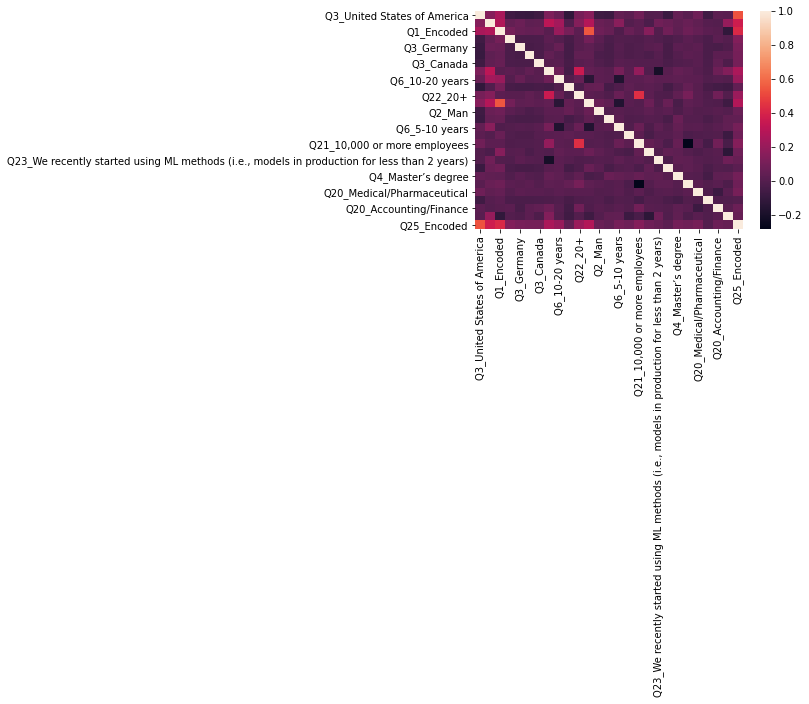

In [47]:
corr=pd.concat([X_train_Final,df_train_y], axis=1).corr()
sns.heatmap(corr)

In [48]:
corr_sort=corr.sort_values(by=['Q25_Encoded'],ascending=False)

In [49]:
corr_sort

,Q3_United States of America,Q15_Encoded,Q1_Encoded,Q3_Australia,Q3_Germany,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_Canada,"Q23_We have well established ML methods (i.e., models in production for more than 2 years)",Q6_10-20 years,Q3_Japan,...,Q5_Program/Project Manager,"Q23_We recently started using ML methods (i.e., models in production for less than 2 years)",Q3_Spain,Q4_Master’s degree,"Q21_1000-9,999 employees",Q20_Medical/Pharmaceutical,Q3_South Korea,Q20_Accounting/Finance,Q5_Data Scientist,Q25_Encoded
Q25_Encoded,0.538233,0.369990,0.418955,0.146189,0.116208,0.106679,0.103383,0.262433,0.207417,0.042735,...,0.082038,0.059421,0.026319,0.099214,0.085650,0.111000,0.005025,0.074488,0.061750,1.000000
Q3_United States of America,1.000000,0.149306,0.255773,-0.060978,-0.081367,-0.082997,-0.064668,0.129775,0.067589,-0.112598,...,-0.002426,0.004678,-0.082276,0.052218,0.020744,0.083864,-0.062385,0.029013,0.021898,0.538233
Q1_Encoded,0.255773,0.279922,1.000000,0.102538,0.064995,0.053311,0.059892,0.016049,0.208876,0.109870,...,0.156633,0.001101,0.090053,0.034898,0.077330,0.056852,0.024747,0.013233,-0.109500,0.418955
Q15_Encoded,0.149306,1.000000,0.279922,0.048203,0.073062,0.035417,0.040434,0.314510,0.239366,-0.005444,...,-0.020250,0.088562,0.070460,0.038127,0.065489,0.038330,0.008864,0.004218,0.201611,0.369990
Q6_20+ years,0.159867,0.286962,0.547848,0.099432,0.032536,0.041471,0.030242,0.045600,-0.136985,0.049711,...,0.073598,-0.005278,0.064823,-0.028389,0.036162,0.021032,-0.006126,-0.007953,-0.064761,0.283522
"Q23_We have well established ML methods (i.e., models in production for more than 2 years)",0.129775,0.314510,0.016049,0.031327,0.007856,0.043614,0.014510,1.000000,0.082817,-0.046160,...,-0.003422,-0.198768,0.013800,0.054436,0.032493,0.010673,-0.013532,0.081226,0.143575,0.262433
Q22_20+,0.107258,0.149312,0.031993,0.015536,0.016222,0.038771,0.017013,0.360486,0.060787,-0.019335,...,0.027924,-0.009792,-0.015056,0.040263,0.111151,0.018365,-0.009419,0.090086,-0.002209,0.216332
Q6_10-20 years,0.067589,0.239366,0.208876,0.005196,0.057936,0.009787,0.019742,0.082817,1.000000,-0.002475,...,0.042626,0.025091,0.027557,0.033060,0.030190,0.025496,-0.006418,0.007740,0.002017,0.207417
"Q21_10,000 or more employees",0.091056,0.027155,0.027688,-0.012800,-0.003203,-0.003540,0.003924,0.194400,0.022482,0.016833,...,0.050734,0.023680,-0.019866,0.058327,-0.277300,0.023514,-0.041872,0.093623,-0.030847,0.151513
Q3_Australia,-0.060978,0.048203,0.102538,1.000000,-0.024596,-0.025088,-0.019548,0.031327,0.005196,-0.034036,...,0.011237,-0.005077,-0.024870,-0.006237,0.024024,0.004587,-0.018858,0.022849,0.002763,0.146189


In [50]:
x=corr_sort.iloc[1:,-1].index
y=corr_sort.iloc[1:,-1]

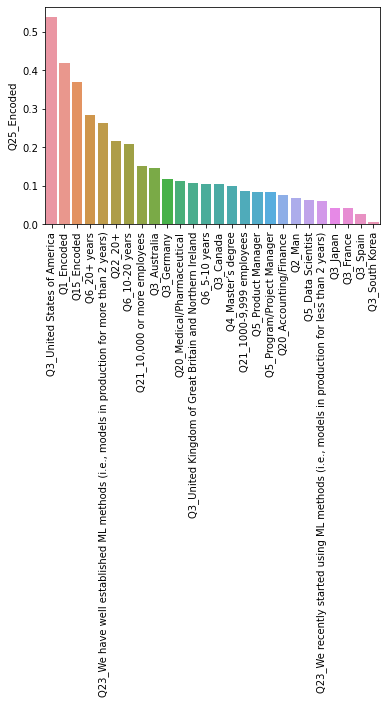

In [51]:
sns.barplot(x=x,y=y)
plt.xticks(rotation=90)
plt.show()

# Part 3:

In [52]:
np.unique(df['Q25_buckets'],return_counts=True)

(array(['0-9,999', '10,000-19,999', '100,000-124,999', '125,000-149,999',
        '150,000-199,999', '20,000-29,999', '200,000-299,999',
        '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999',
        '70,000-79,999', '80,000-89,999', '90,000-99,999', '>300,000'],
       dtype=object),
 array([4460,  960,  554,  304,  338,  652,  210,  479,  456,  487,  387,
         331,  303,  273,  147], dtype=int64))

In [53]:
#get the target values in training set
y_train_Final = df_train['Q25_buckets']
y_train_Final

4771      10,000-19,999
7551      30,000-39,999
3744            0-9,999
6560            0-9,999
954       50,000-59,999
             ...       
7192      30,000-39,999
4848    200,000-299,999
3912            0-9,999
3768            0-9,999
5139            0-9,999
Name: Q25_buckets, Length: 7238, dtype: object

In [54]:
bucket_encode = {   '0-9,999': 0,
    '10,000-19,999': 1, 
    '20,000-29,999': 2,
    '30,000-39,999': 3, 
    '40,000-49,999': 4, 
    '50,000-59,999': 5,
    '60,000-69,999': 6,
    '70,000-79,999': 7, 
    '80,000-89,999': 8, 
    '90,000-99,999': 9,
    '100,000-124,999':10,
    '125,000-149,999':11,
    '150,000-199,999':12,
    '200,000-299,999':13,
    '>300,000':14}

In [55]:
# set up cross validation function
model = LogisticRegression()
X = X_train_Final
Y = y_train_Final
    
kf = KFold(n_splits=10) #n_splits previously n_folds
    
outcomes = []

fold = 0
    
for train_index, test_index in kf.split(X):
    # Store probability of each test data belonging to each of the salary buckets.
    probability=[]
    fold += 1
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
    
    Y_train= pd.Series(Y_train)
    # design ordinal logistic regression algorithm    
    
    ##### No.1 binary classification#####
    y_train1 = Y_train.copy()
    y_train1[y_train1.isin(['0-9,999'])]=1 #make class 1 euqal to 0
    y_train1[~y_train1.isin([1])]=0 # besides class 1, the rest classes are 0
    y_train1=y_train1.astype('int')
    model.fit(X_train, y_train1)
    predict_proba1 = model.predict_proba(X_test) #probability of class 1
    probability.append(predict_proba1[:,1])
    
    ##### No.2 binary classification#####
    y_train2 = Y_train.copy()
    y_train2[y_train2.isin(['0-9,999','10,000-19,999'])]=1 #make class 1 and 2 euqal to 1
    y_train2[~y_train2.isin([1])]=0 #the rest classes are 0
    y_train2=y_train2.astype('int')
    model.fit(X_train, y_train2)
    predict_proba2 = model.predict_proba(X_test)
    probability.append(predict_proba2[:,1]-probability[-1]) # probability of class 2
    
    ##### No.3 binary classification#####
    y_train3 = Y_train.copy()
    y_train3[y_train3.isin(['0-9,999','10,000-19,999','20,000-29,999'])]=1 #make class 1,2,3 euqal to 1
    y_train3[~y_train3.isin([1])]=0
    y_train3=y_train3.astype('int')
    model.fit(X_train, y_train3)
    predict_proba3 = model.predict_proba(X_test)
    probability.append(predict_proba3[:,1]-predict_proba2[:,1])# probability of class 3
    
    ##### No.4 binary classification#####
    y_train4 = Y_train.copy()
    y_train4[y_train4.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999'])]=1 #make class 1,2,3,4 euqal to 1
    y_train4[~y_train4.isin([1])]=0
    y_train4=y_train4.astype('int')
    model.fit(X_train, y_train4)
    predict_proba4 = model.predict_proba(X_test)
    probability.append(predict_proba4[:,1]-predict_proba3[:,1]) # probability of class 4
    
    ##### No.5 binary classification#####
    y_train5 = Y_train.copy()
    y_train5[y_train5.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999'])]=1 #make class 1,2,3,4,5 euqal to 1
    y_train5[~y_train5.isin([1])]=0
    y_train5=y_train5.astype('int')
    model.fit(X_train, y_train5)
    predict_proba5 = model.predict_proba(X_test)
    probability.append(predict_proba5[:,1]-predict_proba4[:,1]) # probability of class 5
    
    ##### No.6 binary classification#####
    y_train6 = Y_train.copy()
    y_train6[y_train6.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999'])]=1
    y_train6[~y_train6.isin([1])]=0
    y_train6=y_train6.astype('int')
    model.fit(X_train, y_train6)
    predict_proba6 = model.predict_proba(X_test)
    probability.append(predict_proba6[:,1]-predict_proba5[:,1]) # probability of class 6
    
    ##### No.7 binary classification#####
    y_train7 = Y_train.copy()
    y_train7[y_train7.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999'])]=1
    y_train7[~y_train7.isin([1])]=0
    y_train7=y_train7.astype('int')
    model.fit(X_train, y_train7)
    predict_proba7 = model.predict_proba(X_test)
    probability.append(predict_proba7[:,1]-predict_proba6[:,1]) # probability of class 7
    
    ##### No.8 binary classification#####
    y_train8 = Y_train.copy()
    y_train8[y_train8.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999'])]=1
    y_train8[~y_train8.isin([1])]=0
    y_train8=y_train8.astype('int')
    model.fit(X_train, y_train8)
    predict_proba8 = model.predict_proba(X_test)
    probability.append(predict_proba8[:,1]-predict_proba7[:,1]) # probability of class 8
    
    ##### No.9 binary classification#####
    y_train9 = Y_train.copy()
    y_train9[y_train9.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999'])]=1
    y_train9[~y_train9.isin([1])]=0
    y_train9=y_train9.astype('int')
    model.fit(X_train, y_train9)
    predict_proba9 = model.predict_proba(X_test)
    probability.append(predict_proba9[:,1]-predict_proba8[:,1]) # probability of class 9
    
    ##### No.10 binary classification#####
    y_train10 = Y_train.copy()
    y_train10[y_train10.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999'])]=1
    y_train10[~y_train10.isin([1])]=0
    y_train10=y_train10.astype('int')
    model.fit(X_train, y_train10)
    predict_proba10 = model.predict_proba(X_test)
    probability.append(predict_proba10[:,1]-predict_proba9[:,1]) # probability of class 10

    ##### No.11 binary classification#####
    y_train11 = Y_train.copy()
    y_train11[y_train11.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999'])]=1
    y_train11[~y_train11.isin([1])]=0
    y_train11=y_train11.astype('int')
    model.fit(X_train, y_train11)
    predict_proba11 = model.predict_proba(X_test)
    probability.append(predict_proba11[:,1]-predict_proba10[:,1]) # probability of class 11
    
    ##### No.12 binary classification#####
    y_train12 = Y_train.copy()
    y_train12[y_train12.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999'])]=1
    y_train12[~y_train12.isin([1])]=0
    y_train12=y_train12.astype('int')
    model.fit(X_train, y_train12)
    predict_proba12 = model.predict_proba(X_test)
    probability.append(predict_proba12[:,1]-predict_proba11[:,1]) # probability of class 12
    
    ##### No.13 binary classification#####
    y_train13 = Y_train.copy()
    y_train13[y_train13.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999'])]=1
    y_train13[~y_train13.isin([1])]=0
    y_train13=y_train13.astype('int')
    model.fit(X_train, y_train13)
    predict_proba13 = model.predict_proba(X_test)
    probability.append(predict_proba13[:,1]-predict_proba12[:,1]) # probability of class 13
    
    ##### No.14 binary classification#####
    y_train14 = Y_train.copy()
    y_train14[y_train14.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999','200,000-299,999'])]=1
    y_train14[~y_train14.isin([1])]=0
    y_train14=y_train14.astype('int')
    model.fit(X_train, y_train14)
    predict_proba14 = model.predict_proba(X_test)
    probability.append(predict_proba14[:,1]-predict_proba13[:,1]) # probability of class 14
    probability.append(predict_proba14[:,0]) # probability of class 15

    #find the predictions
    temp_result = np.array(probability)
    result = np.argmax(temp_result,axis=0)
    y_pred = result.T
    y_pred=y_pred.astype('int')
    y_true = pd.Series(Y_test).map(bucket_encode)
    y_true=y_true.astype('int')

    # calculate f1 score
    f1=sklearn.metrics.f1_score(y_true, y_pred, average='micro') 
    outcomes.append(f1)
    print("Fold {0} f1 Score: {1}".format(fold, f1))   
        
mean_outcome = np.mean(outcomes)
std_outcome=np.std(outcomes)
print("Mean f1 Score: {0}".format(mean_outcome)) 
print("Standard Deviation: {0}".format(std_outcome)) 


Fold 1 f1 Score: 0.505524861878453
Fold 2 f1 Score: 0.4350828729281768
Fold 3 f1 Score: 0.4654696132596685
Fold 4 f1 Score: 0.462707182320442
Fold 5 f1 Score: 0.4696132596685083
Fold 6 f1 Score: 0.43922651933701656
Fold 7 f1 Score: 0.47790055248618785
Fold 8 f1 Score: 0.4544198895027624
Fold 9 f1 Score: 0.4564315352697095
Fold 10 f1 Score: 0.4730290456431535
Mean f1 Score: 0.46394053322940787
Standard Deviation: 0.019061357239860327


**Try differen C values to see models' performance:**

In [56]:
# For simplicity, design ordinal logistic regression algorithm and define it as a function
def ordinal_logistic(X_train, Y_train, X_test, Y_test, probability, model):
    
    Y_train= pd.Series(Y_train)
    
    ##### No.1 binary classification#####
    y_train1 = Y_train.copy()
    y_train1[y_train1.isin(['0-9,999'])]=1
    y_train1[~y_train1.isin([1])]=0
    y_train1=y_train1.astype('int')
    model.fit(X_train, y_train1)
    predict_proba1 = model.predict_proba(X_test)
    probability.append(predict_proba1[:,1])
    
    ##### No.2 binary classification#####
    y_train2 = Y_train.copy()
    y_train2[y_train2.isin(['0-9,999','10,000-19,999'])]=1
    y_train2[~y_train2.isin([1])]=0
    y_train2=y_train2.astype('int')
    model.fit(X_train, y_train2)
    predict_proba2 = model.predict_proba(X_test)
    probability.append(predict_proba2[:,1]-probability[-1])
    
    ##### No.3 binary classification#####
    y_train3 = Y_train.copy()
    y_train3[y_train3.isin(['0-9,999','10,000-19,999','20,000-29,999'])]=1
    y_train3[~y_train3.isin([1])]=0
    y_train3=y_train3.astype('int')
    model.fit(X_train, y_train3)
    predict_proba3 = model.predict_proba(X_test)
    probability.append(predict_proba3[:,1]-predict_proba2[:,1])
    
    ##### No.4 binary classification#####
    y_train4 = Y_train.copy()
    y_train4[y_train4.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999'])]=1
    y_train4[~y_train4.isin([1])]=0
    y_train4=y_train4.astype('int')
    model.fit(X_train, y_train4)
    predict_proba4 = model.predict_proba(X_test)
    probability.append(predict_proba4[:,1]-predict_proba3[:,1])
    
    ##### No.5 binary classification#####
    y_train5 = Y_train.copy()
    y_train5[y_train5.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999'])]=1
    y_train5[~y_train5.isin([1])]=0
    y_train5=y_train5.astype('int')
    model.fit(X_train, y_train5)
    predict_proba5 = model.predict_proba(X_test)
    probability.append(predict_proba5[:,1]-predict_proba4[:,1])
    
    ##### No.6 binary classification#####
    y_train6 = Y_train.copy()
    y_train6[y_train6.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999'])]=1
    y_train6[~y_train6.isin([1])]=0
    y_train6=y_train6.astype('int')
    model.fit(X_train, y_train6)
    predict_proba6 = model.predict_proba(X_test)
    probability.append(predict_proba6[:,1]-predict_proba5[:,1])
    
    ##### No.7 binary classification#####
    y_train7 = Y_train.copy()
    y_train7[y_train7.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999'])]=1
    y_train7[~y_train7.isin([1])]=0
    y_train7=y_train7.astype('int')
    model.fit(X_train, y_train7)
    predict_proba7 = model.predict_proba(X_test)
    probability.append(predict_proba7[:,1]-predict_proba6[:,1])
    
    ##### No.8 binary classification#####
    y_train8 = Y_train.copy()
    y_train8[y_train8.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999'])]=1
    y_train8[~y_train8.isin([1])]=0
    y_train8=y_train8.astype('int')
    model.fit(X_train, y_train8)
    predict_proba8 = model.predict_proba(X_test)
    probability.append(predict_proba8[:,1]-predict_proba7[:,1])
    
    ##### No.9 binary classification#####
    y_train9 = Y_train.copy()
    y_train9[y_train9.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999'])]=1
    y_train9[~y_train9.isin([1])]=0
    y_train9=y_train9.astype('int')
    model.fit(X_train, y_train9)
    predict_proba9 = model.predict_proba(X_test)
    probability.append(predict_proba9[:,1]-predict_proba8[:,1])
    
    ##### No.10 binary classification#####
    y_train10 = Y_train.copy()
    y_train10[y_train10.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999'])]=1
    y_train10[~y_train10.isin([1])]=0
    y_train10=y_train10.astype('int')
    model.fit(X_train, y_train10)
    predict_proba10 = model.predict_proba(X_test)
    probability.append(predict_proba10[:,1]-predict_proba9[:,1])

    ##### No.11 binary classification#####
    y_train11 = Y_train.copy()
    y_train11[y_train11.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999'])]=1
    y_train11[~y_train11.isin([1])]=0
    y_train11=y_train11.astype('int')
    model.fit(X_train, y_train11)
    predict_proba11 = model.predict_proba(X_test)
    probability.append(predict_proba11[:,1]-predict_proba10[:,1])
    
    ##### No.12 binary classification#####
    y_train12 = Y_train.copy()
    y_train12[y_train12.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999'])]=1
    y_train12[~y_train12.isin([1])]=0
    y_train12=y_train12.astype('int')
    model.fit(X_train, y_train12)
    predict_proba12 = model.predict_proba(X_test)
    probability.append(predict_proba12[:,1]-predict_proba11[:,1])
    
    ##### No.13 binary classification#####
    y_train13 = Y_train.copy()
    y_train13[y_train13.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999'])]=1
    y_train13[~y_train13.isin([1])]=0
    y_train13=y_train13.astype('int')
    model.fit(X_train, y_train13)
    predict_proba13 = model.predict_proba(X_test)
    probability.append(predict_proba13[:,1]-predict_proba12[:,1])
    
    ##### No.14 binary classification#####
    y_train14 = Y_train.copy()
    y_train14[y_train14.isin(['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999','200,000-299,999'])]=1
    y_train14[~y_train14.isin([1])]=0
    y_train14=y_train14.astype('int')
    model.fit(X_train, y_train14)
    predict_proba14 = model.predict_proba(X_test)
    probability.append(predict_proba14[:,1]-predict_proba13[:,1])
    probability.append(predict_proba14[:,0])

    #print("The shape of probability to each of the salary buckets is",np.shape(probability))
    return probability
  


In [62]:
for C in [0.001,0.01,0.1,0.3,0.5,1,5,10,100]:
    model = LogisticRegression(C=C)
    X = X_train_Final
    Y = y_train_Final
    kf = KFold(n_splits=10) #n_splits previously n_folds
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X):
        # Store probability of each test data belonging to each of the salary buckets.
        probabilities=[]
        fold += 1
        Xm_train, Xm_test = X.values[train_index], X.values[test_index]
        Ym_train, Ym_test = Y.values[train_index], Y.values[test_index]
        #call ordinal logistic function
        prob = ordinal_logistic(Xm_train, Ym_train, Xm_test, Ym_test, probabilities, model)
        #find the predictions
        temp_result = np.array(prob)
        result = np.argmax(temp_result,axis=0) #The class with highest probability is the prediction
        y_pred = result.T
        y_pred=y_pred.astype('int')
        y_true = pd.Series(Ym_test).map(bucket_encode)
        y_true=y_true.astype('int')
        # calculate f1 score
        f1=sklearn.metrics.f1_score(y_true, y_pred, average='micro') 
        outcomes.append(f1)
        print("Fold {0} f1 Score: {1}".format(fold, f1))   
    mean_outcome = np.mean(outcomes)
    print("For C={0}, mean f1 Score: {1}".format(C, mean_outcome)) 

Fold 1 f1 Score: 0.48480662983425415
Fold 2 f1 Score: 0.4143646408839779
Fold 3 f1 Score: 0.4709944751381216
Fold 4 f1 Score: 0.44060773480662985
Fold 5 f1 Score: 0.4488950276243094
Fold 6 f1 Score: 0.425414364640884
Fold 7 f1 Score: 0.4654696132596685
Fold 8 f1 Score: 0.4447513812154696
Fold 9 f1 Score: 0.4605809128630705
Fold 10 f1 Score: 0.4536652835408022
For C=0.001, mean f1 Score: 0.4509550063807188
Fold 1 f1 Score: 0.5069060773480663
Fold 2 f1 Score: 0.42955801104972374
Fold 3 f1 Score: 0.46685082872928174
Fold 4 f1 Score: 0.457182320441989
Fold 5 f1 Score: 0.45994475138121543
Fold 6 f1 Score: 0.4350828729281768
Fold 7 f1 Score: 0.47513812154696133
Fold 8 f1 Score: 0.457182320441989
Fold 9 f1 Score: 0.4578146611341632
Fold 10 f1 Score: 0.4702627939142462
For C=0.01, mean f1 Score: 0.4615922758915813
Fold 1 f1 Score: 0.505524861878453
Fold 2 f1 Score: 0.43646408839779005
Fold 3 f1 Score: 0.46823204419889497
Fold 4 f1 Score: 0.4613259668508287
Fold 5 f1 Score: 0.4696132596685083
F

# Part 4:

**Model Tunning for 2 hyperparameters:**

In [63]:
best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.1,0.5, 1, 10, 100]:
    for solver in  ['sag','newton-cg','lbfgs']:
        model = LogisticRegression(C = C, solver=solver, max_iter=500)
        X = X_train_Final
        Y = y_train_Final
        kf = KFold(n_splits=10) #n_splits previously n_folds
        outcomes = []
        fold = 0
        for train_index, test_index in kf.split(X):
            # Store probability of each test data belonging to each of the salary buckets.
            probability=[]
            fold += 1
            X_tun_train, X_tun_test = X.values[train_index], X.values[test_index]
            Y_tun_train, Y_tun_test = Y.values[train_index], Y.values[test_index]
            #call ordinal logistic function
            prob = ordinal_logistic(X_tun_train, Y_tun_train, X_tun_test, Y_tun_test, probability, model)
            #find the predictions
            temp_result = np.array(prob)
            result = np.argmax(temp_result,axis=0) #The class with highest probability is the prediction
            y_pred = result.T
            y_pred=y_pred.astype('int')
            y_true = pd.Series(Y_tun_test).map(bucket_encode)
            y_true=y_true.astype('int')
            # calculate f1 score
            f1=sklearn.metrics.f1_score(y_true, y_pred, average='micro') 
            outcomes.append(f1)
       
        if np.mean(outcomes) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(outcomes)
            best_std = np.std(outcomes)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,5),round(best_std,5)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))
    

C:\Users\le985\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\le985\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\le985\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\le985\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\le985\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

{'C': 0.1, 'solver': 'sag'}
Best Score: 0.46422%(0.01938%)

The optimal log model uses C=0.1, and a sag solver, and has a cross validation score of 0.464% with a standard deviation of 0.019%


**Optimal Model and Predictions:**

In [80]:
model_op= LogisticRegression(C=0.1,solver='sag')
X = X_train_Final
Y = y_train_Final
#X_op_train, X_op_test, Y_op_train, Y_op_test = train_test_split(X, Y, test_size=0.3, random_state=27)
# Store probability of test data belonging to each of the salary buckets.
proba=[]
#call ordinal logistic function
#proba = ordinal_logistic(X_op_train, Y_op_train, X_op_test, Y_op_test, proba, model_op)
proba = ordinal_logistic(X,Y,X,Y, proba, model_op)
#find the predictions
temp_result = np.array(proba)
result = np.argmax(temp_result,axis=0) #The class with highest probability is the prediction
y_predict = result.T
y_predict=y_predict.astype('int')
y_actual = pd.Series(Y).map(bucket_encode)
y_actual=y_actual.astype('int')
        
# calculate f1 score
f1=sklearn.metrics.f1_score(y_actual, y_predict, average='micro') 
print("The f1 Score for the optimal model is",f1)
 

The f1 Score for the optimal model is 0.4758220502901354


In [81]:
y_predict=pd.Series(y_predict,name='predict')

<AxesSubplot:>

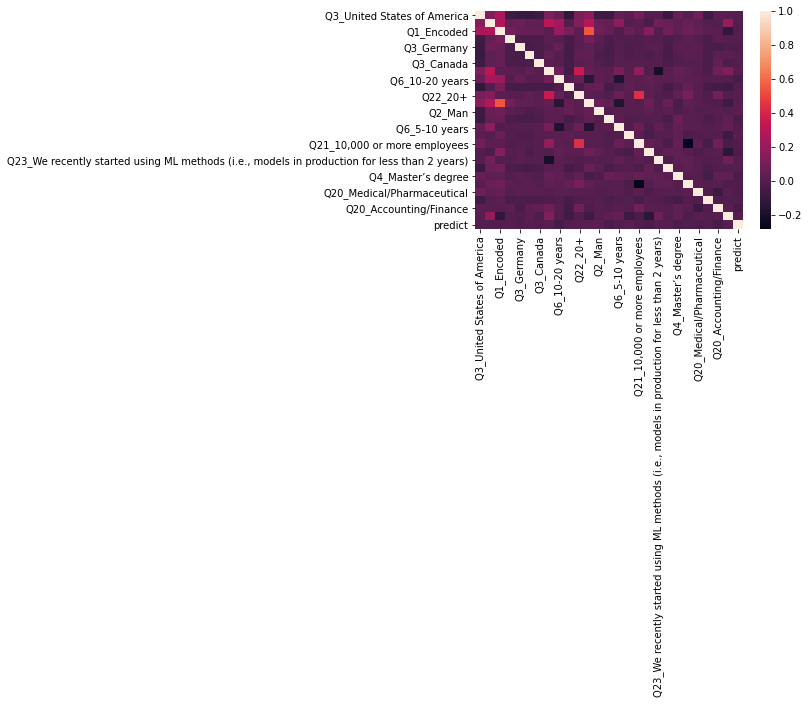

In [82]:
# calculate correlation between features and predicted value on training set
correlation=pd.concat([X_train_Final,y_predict], axis=1).corr()
sns.heatmap(correlation)

In [83]:
correlation_sort=correlation.sort_values(by=['predict'],ascending=False)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

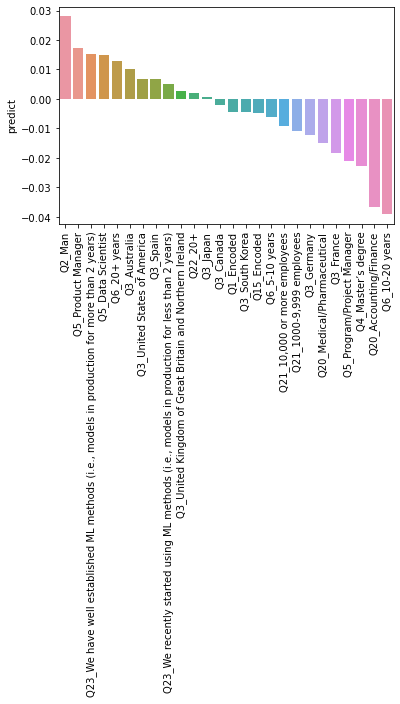

In [84]:
# Plot feature importance using predicted values on training set
x1=correlation_sort.iloc[1:,-1].index
y1=correlation_sort.iloc[1:,-1]
sns.barplot(x=x1,y=y1)
plt.xticks(rotation=90)
plt.show()

# Part 5:

In [85]:
Xt = X_train_Final
Yt= y_train_Final
prob=[]
# Test on the testset
prob = ordinal_logistic(Xt, Yt, X_test_Final, df_test_y, prob, model_op)
        
#find the predictions
prob_array= np.array(prob)
results = np.argmax(prob_array,axis=0) #The class with highest probability is the prediction with encode
y_prediction = results.T
y_prediction=y_prediction.astype('int')
y_real = pd.Series(df_test_y)

f1=sklearn.metrics.f1_score(y_real, y_prediction, average='micro') 
print("The f1 Score for the optimal model on the test data is",f1)

The f1 Score for the optimal model on the test data is 0.441185949081534


In [86]:
encode_bucket = {  0: '0-9,999',
    1: '10,000-19,999', 
    2: '20,000-29,999',
    3: '30,000-39,999', 
    4: '40,000-49,999', 
    5: '50,000-59,999',
    6: '60,000-69,999',
    7: '70,000-79,999', 
    8: '80,000-89,999', 
    9: '90,000-99,999',
    10: '100,000-124,999',
    11: '125,000-149,999',
    12:  '150,000-199,999',
    13: '200,000-299,999',
    14: '>300,000'}

For testset:

In [87]:
# map the encoding values to the bucket values
test_y = pd.DataFrame(y_real.map(encode_bucket))
test_y

,Q25_Encoded
1200,"0-9,999"
7059,"100,000-124,999"
9181,"20,000-29,999"
9899,"0-9,999"
2114,"125,000-149,999"
...,...
9009,"0-9,999"
83,"10,000-19,999"
3295,"0-9,999"
8998,"60,000-69,999"


In [88]:
# map the encoding values to the bucket values
predict_y = pd.DataFrame(pd.Series(y_prediction).map(encode_bucket),columns=['Q25_predict'])
predict_y

,Q25_predict
0,"0-9,999"
1,"0-9,999"
2,"0-9,999"
3,"50,000-59,999"
4,"125,000-149,999"
...,...
3098,"0-9,999"
3099,"0-9,999"
3100,"0-9,999"
3101,"50,000-59,999"


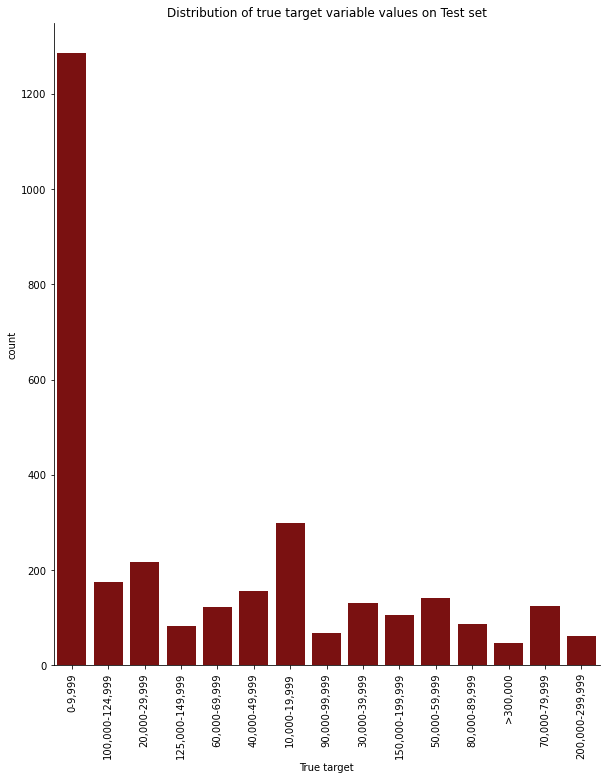

In [96]:
# plot distribution of true target variable values on Test set
ax=sns.catplot(x='Q25_Encoded',data=test_y, kind="count",color = 'darkred')
ax.fig.set_size_inches(10,10) 
plt.xticks(rotation=90)
plt.xlabel('True target')
plt.title("Distribution of true target variable values on Test set")
plt.show()

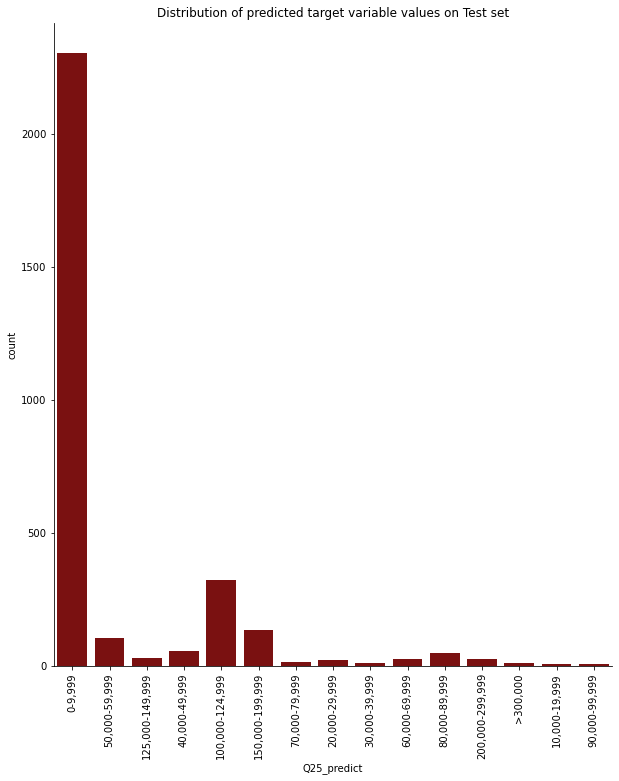

In [97]:
# plot distribution of predicted target variable values on Test set
ax2=sns.catplot(x='Q25_predict',data=predict_y, kind="count",color = 'darkred')
ax2.fig.set_size_inches(10,10) 
plt.xticks(rotation=90)
plt.title("Distribution of predicted target variable values on Test set")
plt.show()

For training set:

In [95]:
train_y_real=pd.DataFrame(Yt)
train_y_real

,Q25_buckets
4771,"10,000-19,999"
7551,"30,000-39,999"
3744,"0-9,999"
6560,"0-9,999"
954,"50,000-59,999"
...,...
7192,"30,000-39,999"
4848,"200,000-299,999"
3912,"0-9,999"
3768,"0-9,999"


In [92]:
train_pred_y=(y_predict).map(encode_bucket)
train_pred_y=pd.DataFrame(train_pred_y)
train_pred_y

,predict
0,"0-9,999"
1,"0-9,999"
2,"0-9,999"
3,"0-9,999"
4,"0-9,999"
...,...
7233,"0-9,999"
7234,"200,000-299,999"
7235,"0-9,999"
7236,"0-9,999"


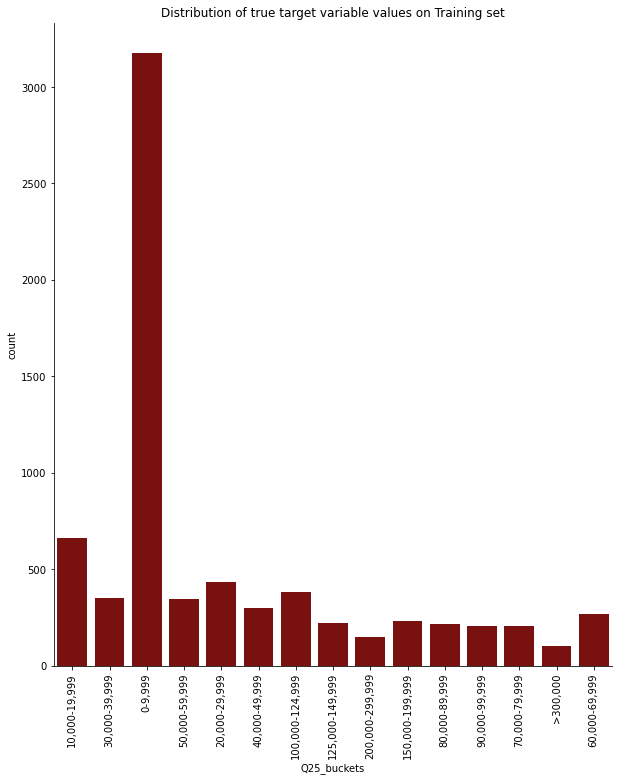

In [98]:
# plot distribution of true target variable values on Training set
ax=sns.catplot(x='Q25_buckets',data=train_y_real, kind="count",color = 'darkred')
ax.fig.set_size_inches(10,10) 
plt.xticks(rotation=90)
plt.title("Distribution of true target variable values on Training set")
plt.show()

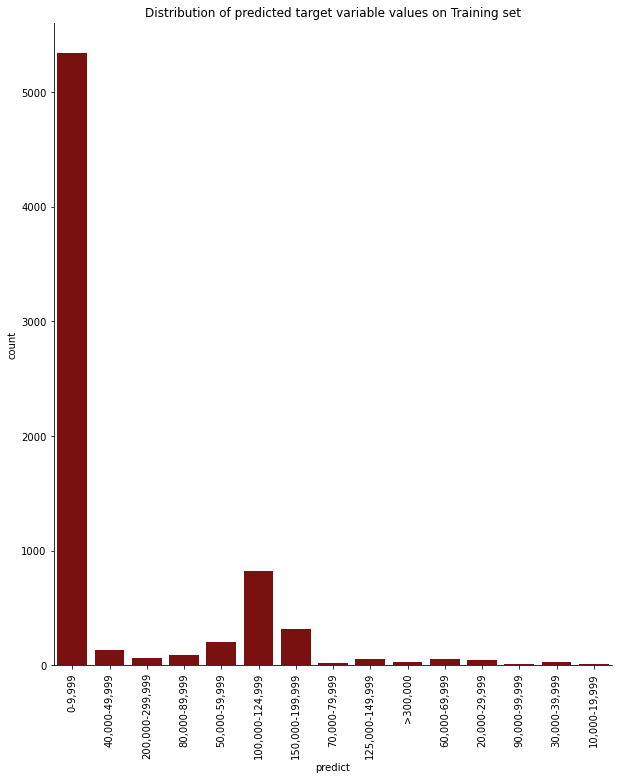

In [99]:
# plot distribution of predicted target variable values on Training set
ax=sns.catplot(x='predict',data=train_pred_y, kind="count",color = 'darkred')
ax.fig.set_size_inches(10,10) 
plt.xticks(rotation=90)
plt.title("Distribution of predicted target variable values on Training set")
plt.show()